In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
import numpy as np


# Data Preparation


In [ ]:
data = pd.read_csv("train.csv")
data.head()


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


# Data Visualisation

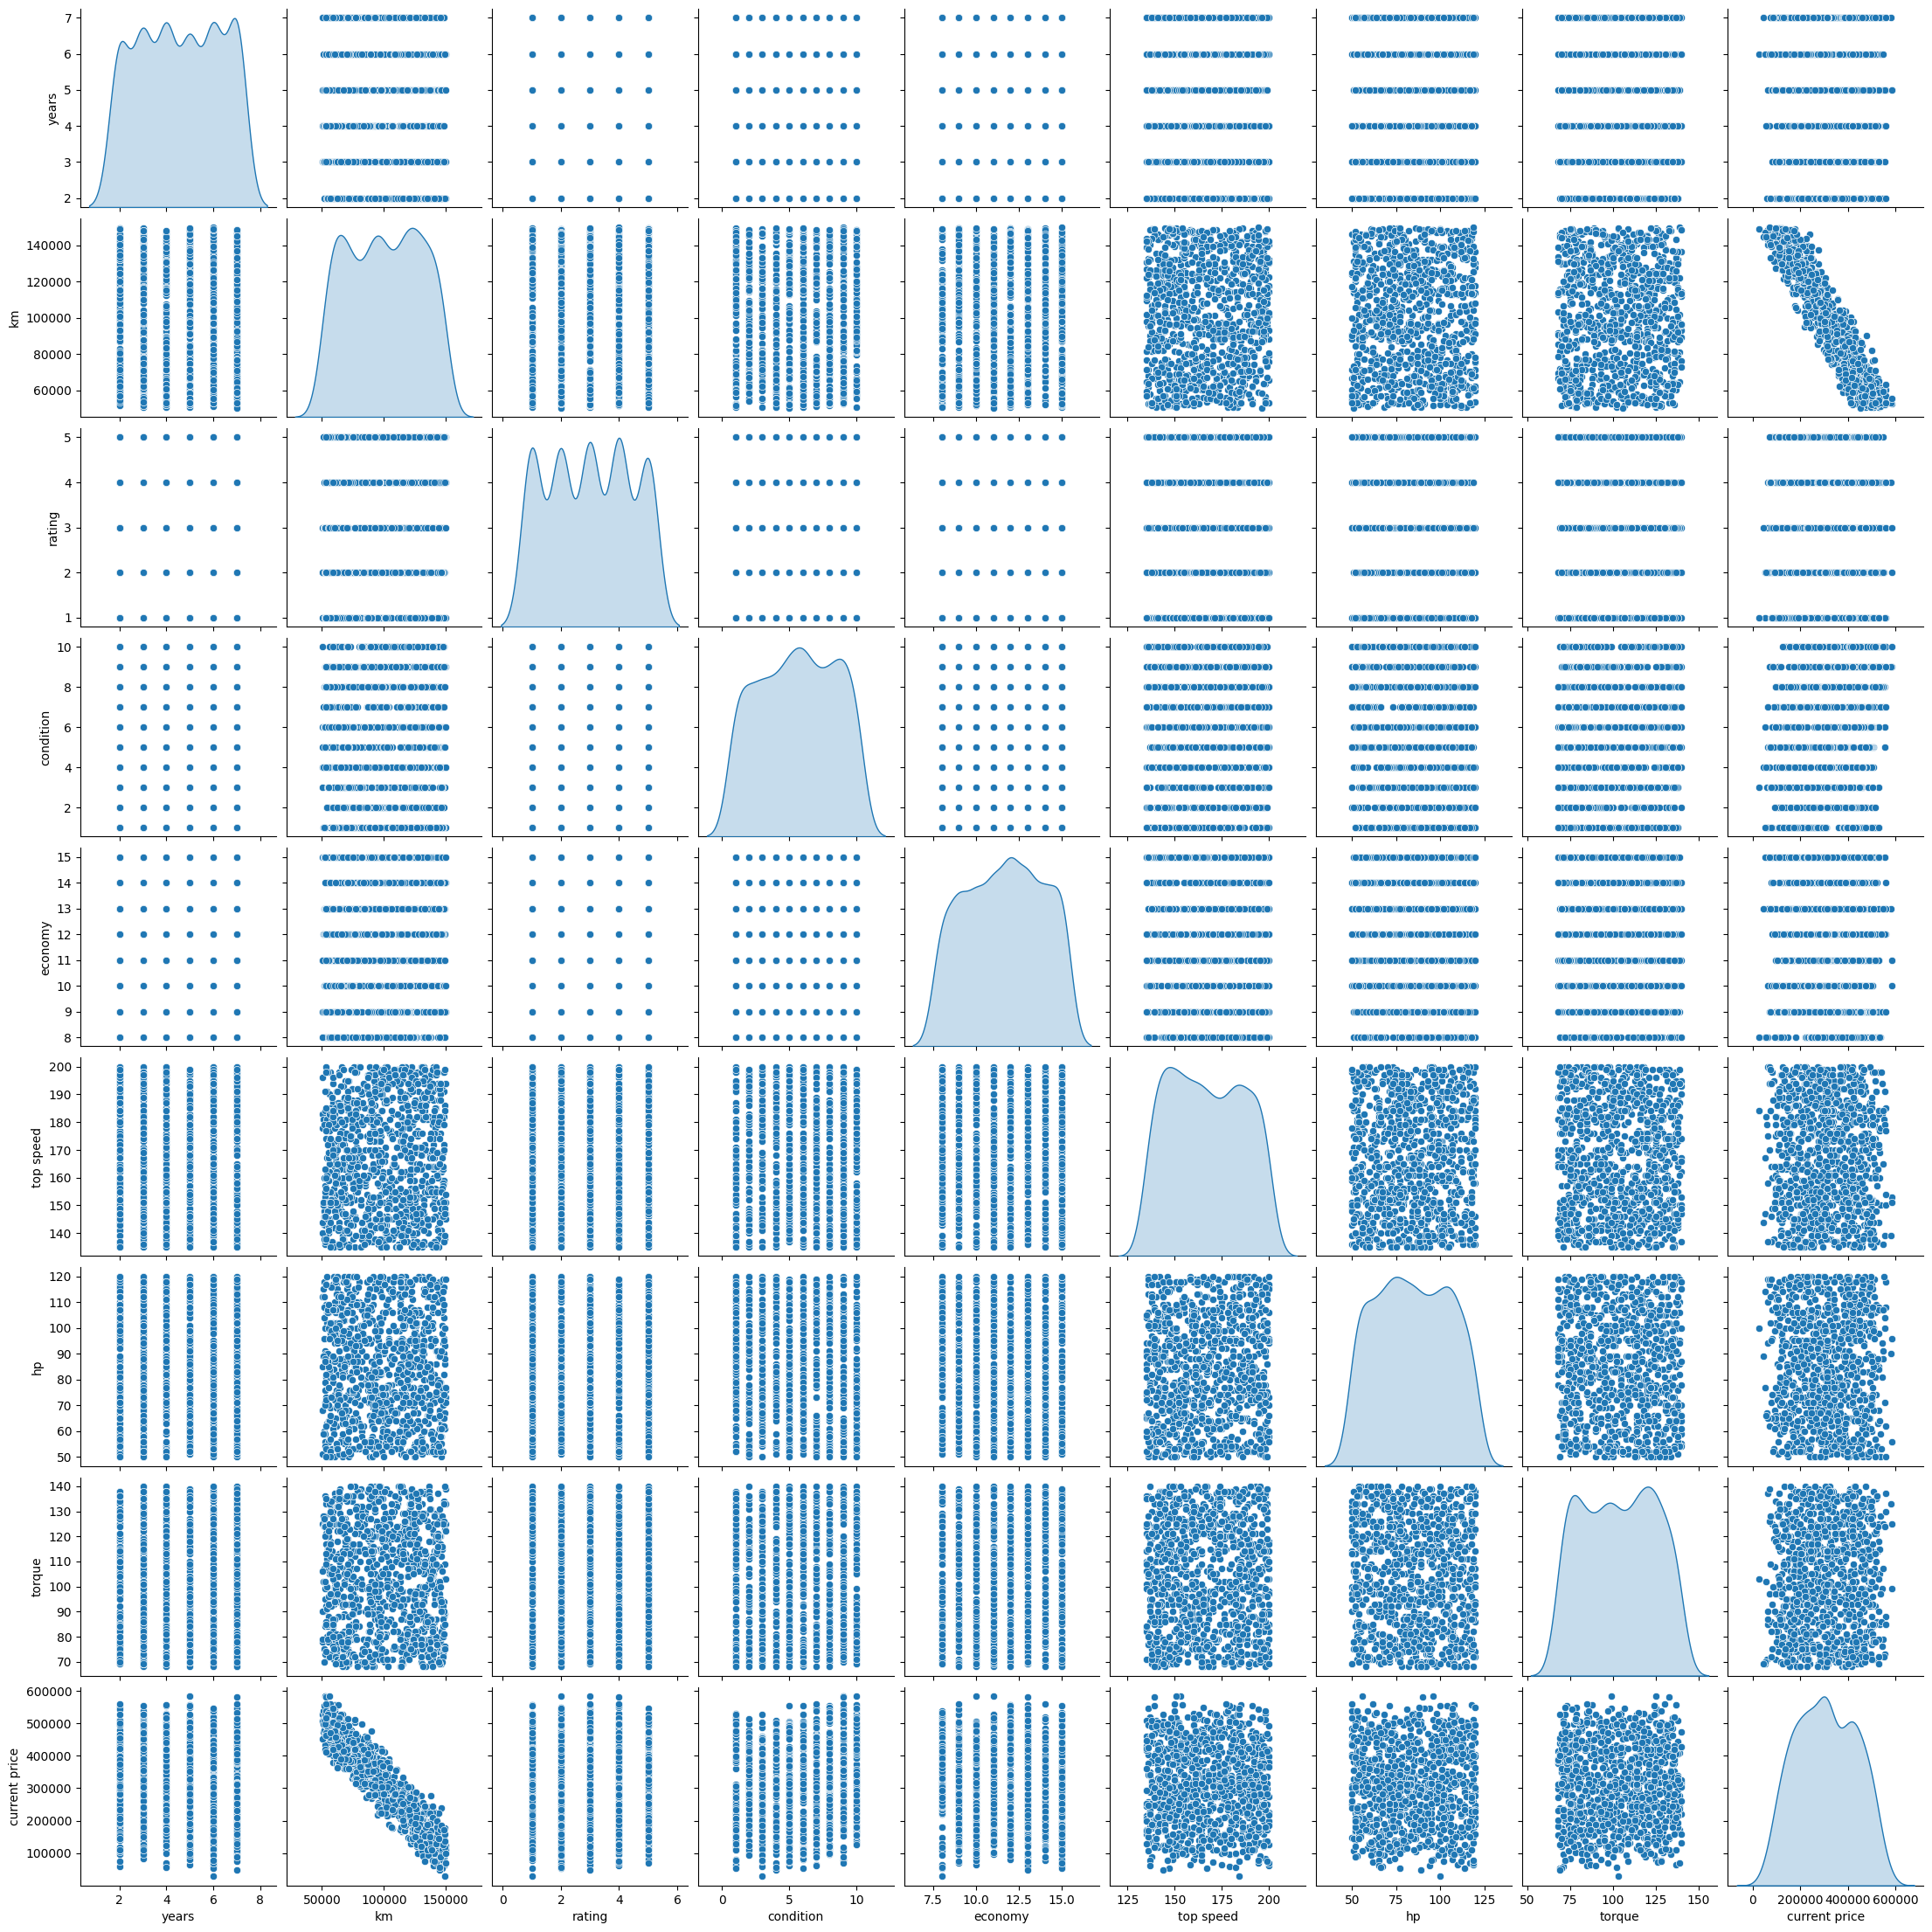

In [ ]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

# Data Preprocessing

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data , tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[1.250000e+02 6.434950e+05 8.006440e+05 ... 8.900000e+01 1.000000e+02
  3.424270e+05]
 [6.990000e+02 5.109500e+05 7.628800e+05 ... 6.600000e+01 1.180000e+02
  9.752600e+04]
 [1.050000e+02 5.002650e+05 7.531480e+05 ... 1.080000e+02 8.400000e+01
  4.176935e+05]
 ...
 [7.670000e+02 6.982840e+05 7.632170e+05 ... 5.200000e+01 9.200000e+01
  1.701045e+05]
 [4.750000e+02 5.980990e+05 7.652900e+05 ... 1.030000e+02 7.500000e+01
  4.329515e+05]
 [3.570000e+02 5.147790e+05 7.590610e+05 ... 1.000000e+02 1.370000e+02
  1.098285e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
x = tensor_data[:,3:-1] ##input
print(x)

tf.Tensor(
[[7.00000e+00 9.32700e+04 2.00000e+00 ... 1.92000e+02 8.90000e+01
  1.00000e+02]
 [3.00000e+00 1.36240e+05 5.00000e+00 ... 1.56000e+02 6.60000e+01
  1.18000e+02]
 [7.00000e+00 5.27010e+04 5.00000e+00 ... 1.84000e+02 1.08000e+02
  8.40000e+01]
 ...
 [5.00000e+00 1.47599e+05 5.00000e+00 ... 1.63000e+02 5.20000e+01
  9.20000e+01]
 [7.00000e+00 6.75200e+04 2.00000e+00 ... 1.41000e+02 1.03000e+02
  7.50000e+01]
 [4.00000e+00 1.32690e+05 2.00000e+00 ... 1.72000e+02 1.00000e+02
  1.37000e+02]], shape=(1000, 8), dtype=float32)


In [ ]:
y = tensor_data[:,-1] ##output
y= tf.expand_dims(y, axis = -1)
print(y[:5])

tf.Tensor(
[[342427. ]
 [ 97526. ]
 [417693.5]
 [218814. ]
 [381846.5]], shape=(5, 1), dtype=float32)


# Data Splitting

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [ ]:
x_train = x[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)



(800, 8)
(800, 1)


In [ ]:
x_val = x[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)) ]
print(x_val.shape)
print(y_val.shape)


(100, 8)
(100, 1)


In [ ]:
x_test = x[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)) :]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)) :]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


# Model Creation and Training

In [ ]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x)


<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 1.4048862 , -0.25555772, -0.706674  , ...,  1.311938  ,
         0.18902479, -0.13973942],
       [-0.90530664,  1.2247951 ,  1.424002  , ..., -0.5567896 ,
        -0.9268059 ,  0.7216662 ],
       [ 1.4048862 , -1.653194  ,  1.424002  , ...,  0.8966653 ,
         1.110798  , -0.90543336],
       ...,
       [ 0.24978982,  1.6161222 ,  1.424002  , ..., -0.19342588,
        -1.6060072 , -0.5225864 ],
       [ 1.4048862 , -1.1426669 , -0.706674  , ..., -1.3354261 ,
         0.8682261 , -1.3361362 ],
       [-0.3277584 ,  1.1024946 , -0.706674  , ...,  0.27375603,
         0.72268295,  1.6309278 ]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    normalizer,
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1)]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

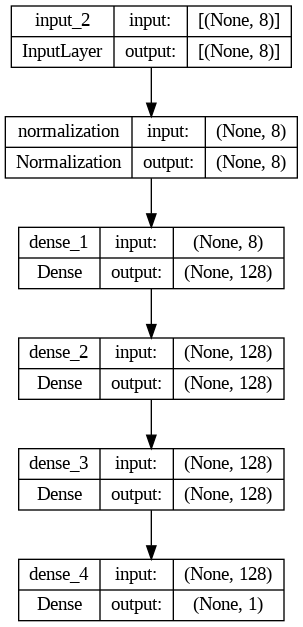

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png" , show_shapes=True)

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.1),
loss = MeanAbsoluteError(),
metrics = RootMeanSquaredError())

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs = 100, verbose =1)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 147746.9531 - root_mean_squared_error: 196253.5469 - val_loss: 67479.4453 - val_root_mean_squared_error: 79271.1250
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 49380.7812 - root_mean_squared_error: 61096.7266 - val_loss: 45029.0859 - val_root_mean_squared_error: 54219.3477
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 42936.6289 - root_mean_squared_error: 53093.7930 - val_loss: 37013.7109 - val_root_mean_squared_error: 47728.5703
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 37504.7539 - root_mean_squared_error: 46373.1914 - val_loss: 42285.3945 - val_root_mean_squared_error: 51729.5078
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 44629.0391 - root_mean_squared_error: 56280.6914 - val_loss: 41013.9609 - val_root_mean_squared_error: 50137.3281
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

In [ ]:
history.history

{'loss': [147746.953125,
  49380.78125,
  42936.62890625,
  37504.75390625,
  44629.0390625,
  40671.08984375,
  45896.17578125,
  38712.5,
  38314.421875,
  37141.7890625,
  41477.5703125,
  42124.01171875,
  45096.10546875,
  46480.80859375,
  42202.7734375,
  41338.03515625,
  37458.921875,
  36923.81640625,
  40716.1015625,
  35901.171875,
  36820.11328125,
  37174.56640625,
  37767.484375,
  37464.9765625,
  35598.69140625,
  36103.890625,
  35984.24609375,
  38557.81640625,
  40533.91015625,
  39531.296875,
  41081.29296875,
  36650.63671875,
  39831.140625,
  37999.55078125,
  37809.640625,
  35876.73828125,
  40401.80859375,
  37458.14453125,
  35287.8984375,
  39591.18359375,
  35233.78125,
  37373.34375,
  33445.796875,
  35056.44921875,
  36752.03515625,
  33867.30078125,
  34991.12109375,
  35758.64453125,
  34892.875,
  36417.88671875,
  39196.921875,
  35529.30859375,
  35336.8515625,
  37526.0546875,
  35924.17578125,
  34391.625,
  34081.98828125,
  41858.30078125,
  35

# Plotting Loss

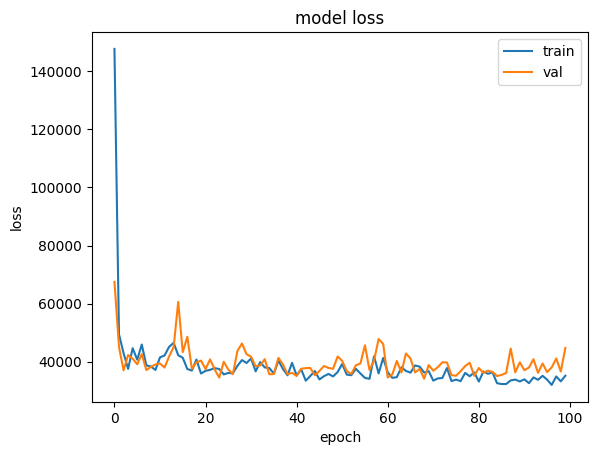

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

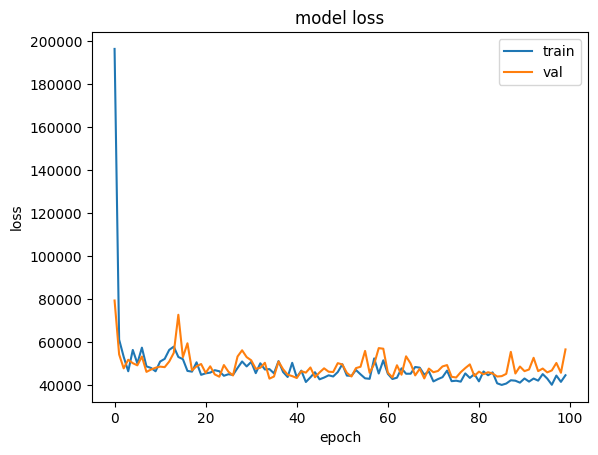

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

# Model Evaluation and Testing

In [ ]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 0s 4ms/step - loss: 44706.9219 - root_mean_squared_error: 56528.0508


[44706.921875, 56528.05078125]

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 51148.0234 - root_mean_squared_error: 62260.2344


[51148.0234375, 62260.234375]

In [ ]:
model.predict(tf.expand_dims(x_test[0], axis=0  ))

1/1 [==============================] - 0s 71ms/step


array([[104192.19]], dtype=float32)

In [ ]:
print(y_test[0])

tf.Tensor([96554.], shape=(1,), dtype=float32)


In [ ]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[104192.17, 260729.89, 381889.3, 240312.89, 237052.6, 134773.97, 411246.2, 260337.66, 448996.2, 356643.62, 454304.44, 377740.06, 145038.1, 235194.67, 372310.53, 377612.38, 427660.8, 397748.3, 426235.62, 193378.56, 469028.78, 421888.25, 204932.28, 167145.48, 139574.19, 346704.38, 105307.89, 385235.62, 417453.6, 330695.38, 481152.5, 210424.81, 383733.44, 397795.3, 289913.7, 187968.47, 236911.62, 194690.89, 200218.53, 469087.12, 204731.08, 303251.25, 115623.77, 343366.12, 183607.17, 253302.2, 201748.42, 188097.42, 243612.12, 159407.77, 335674.0, 495683.88, 192635.34, 379291.34, 137110.3, 329341.25, 215924.03, 408676.53, 419292.94, 175406.67, 176405.17, 398504.5, 118850.51, 315718.1, 428566.22, 414718.34, 158457.95, 364083.2, 348088.12, 478591.3, 264184.88, 455034.75, 383501.7, 406164.03, 86620.62, 202067.05, 287792.1, 296487.38, 529617.94, 158789.72, 134135.2, 346575.94, 345495.38, 101226.28, 232711.61, 382837.06, 361234.03, 327501.8, 233

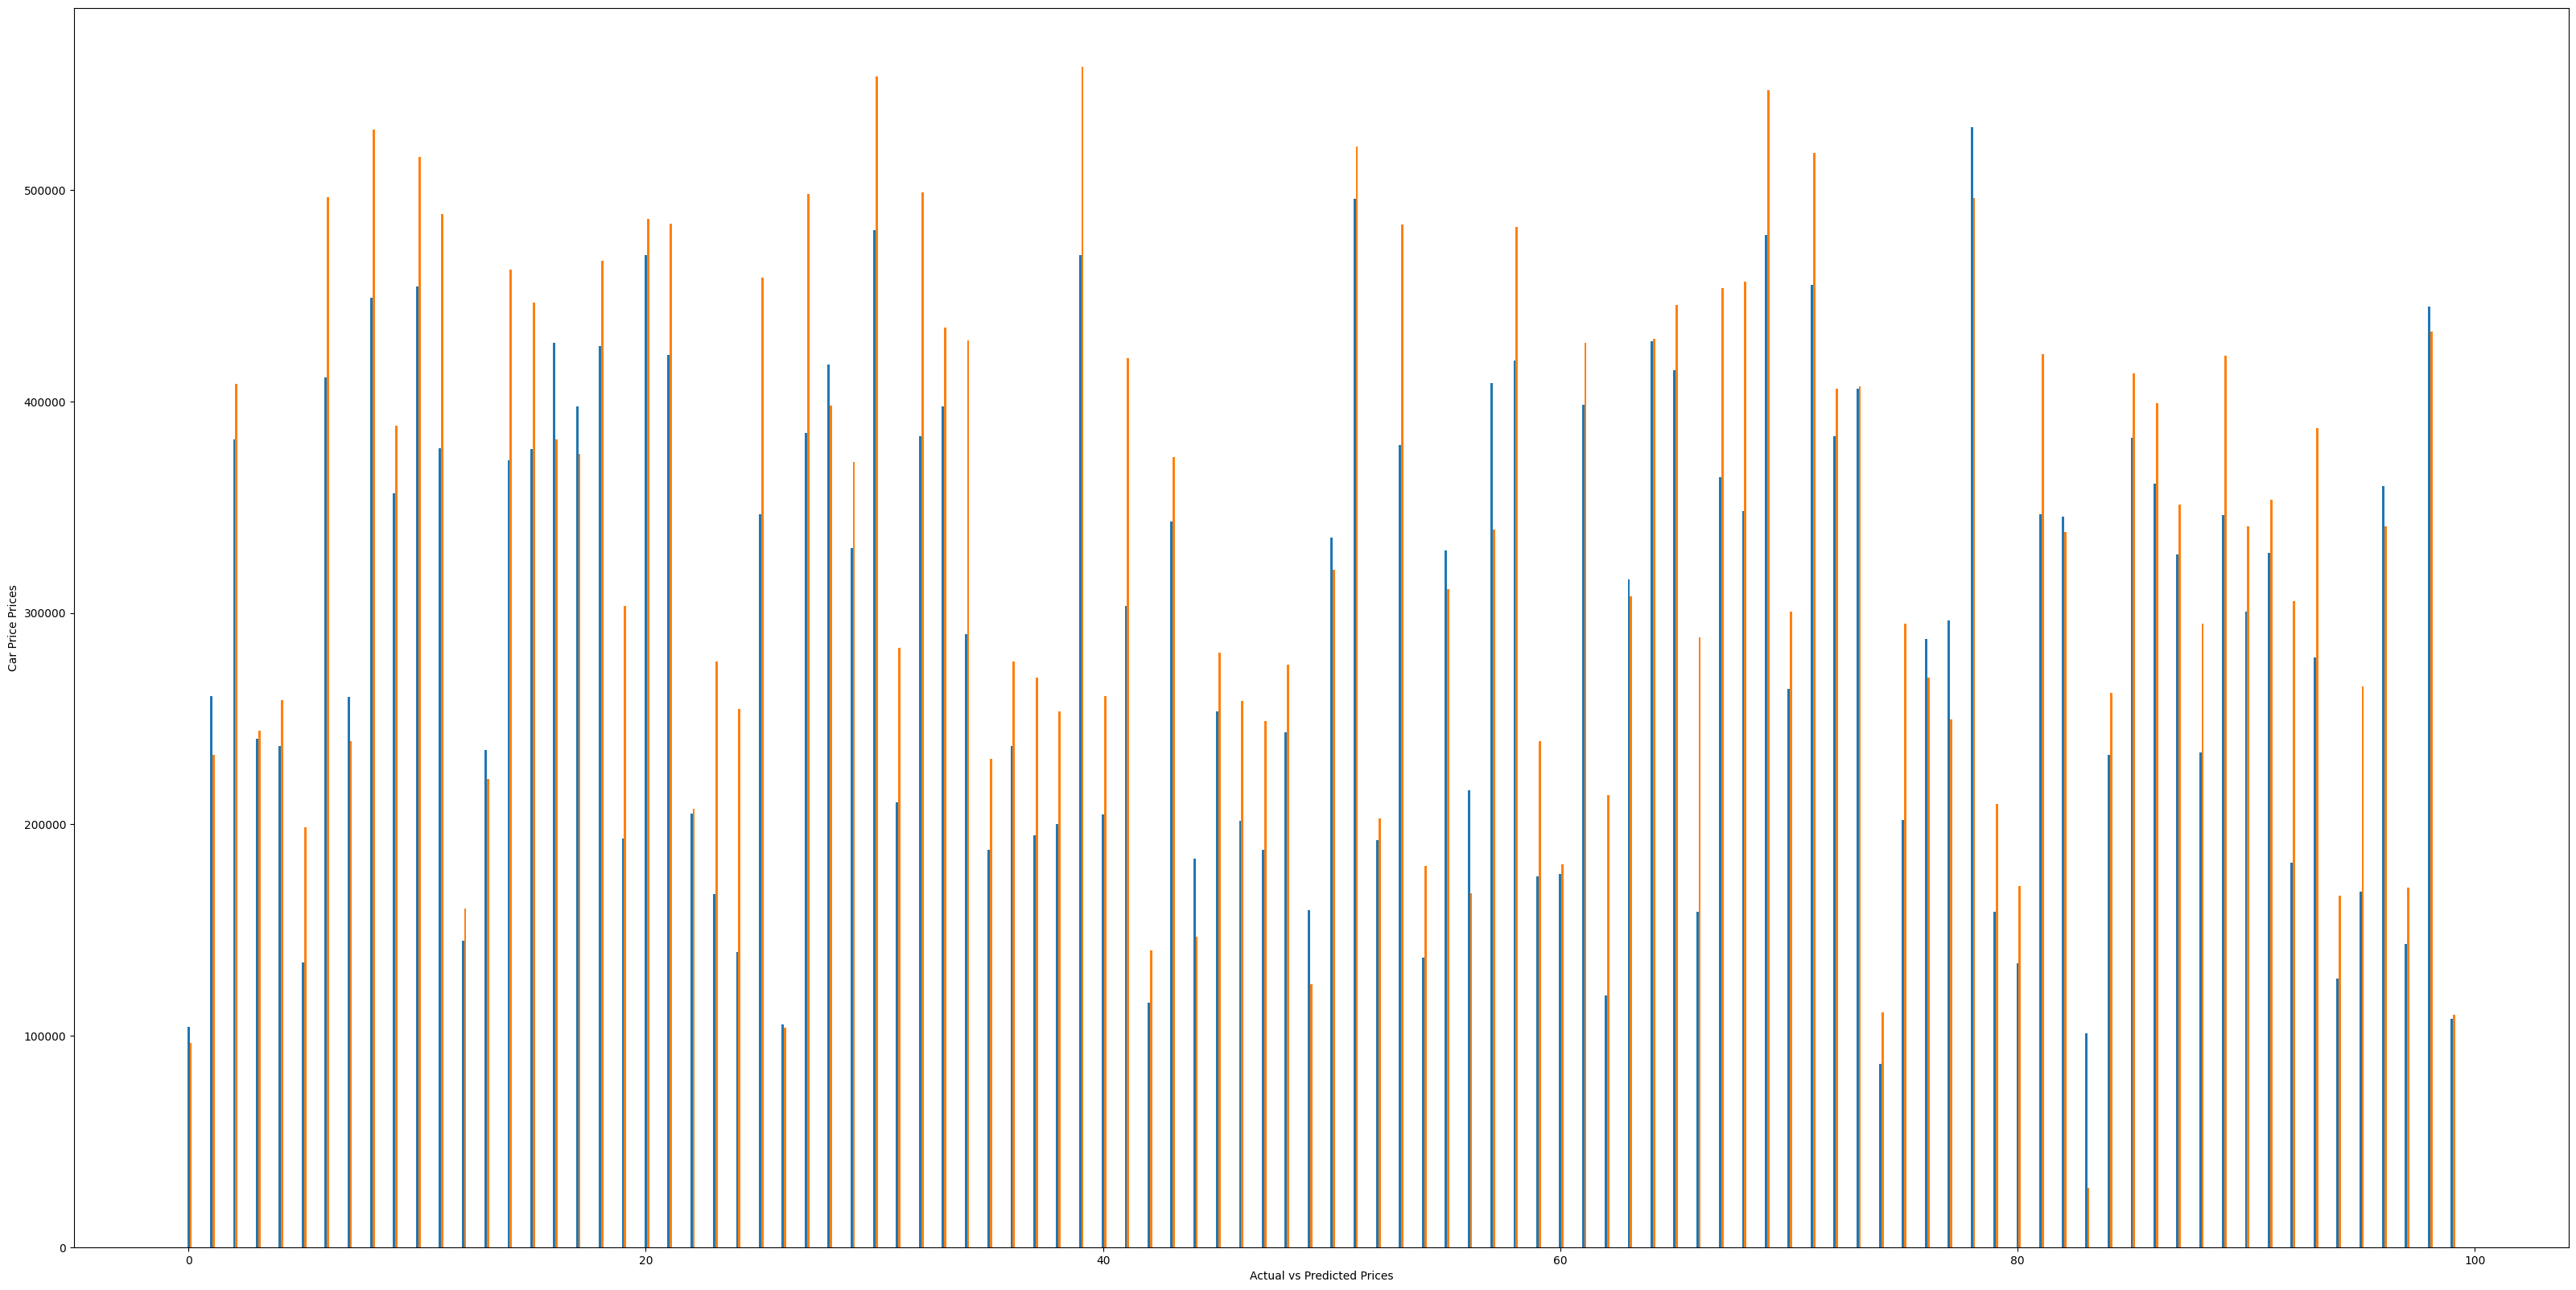

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()